In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [6]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None
        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.85800

In [21]:
# Check for missing values
print(data.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


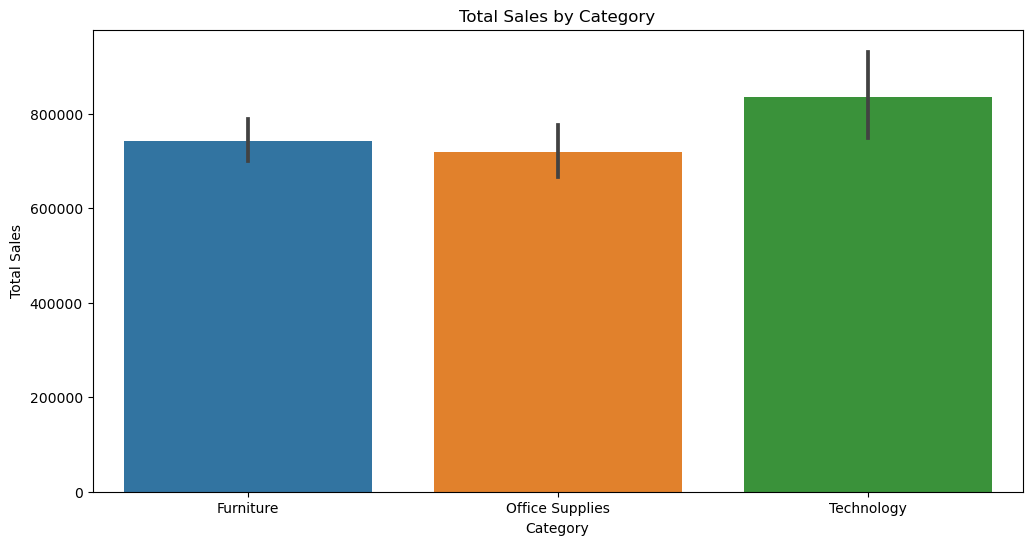

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=data, estimator=np.sum)
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.show()


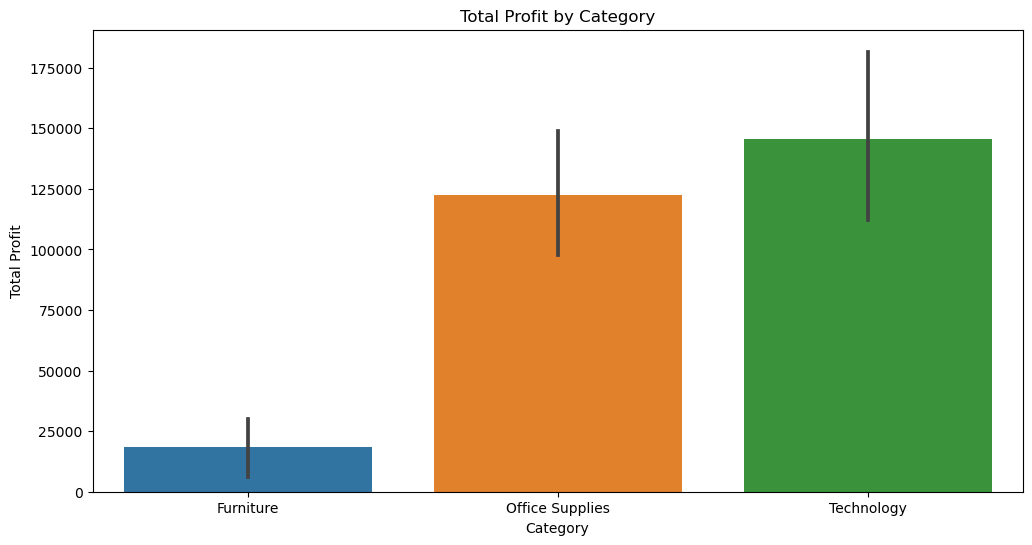

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', data=data, estimator=np.sum)
plt.title("Total Profit by Category")
plt.ylabel("Total Profit")
plt.xlabel("Category")
plt.show()

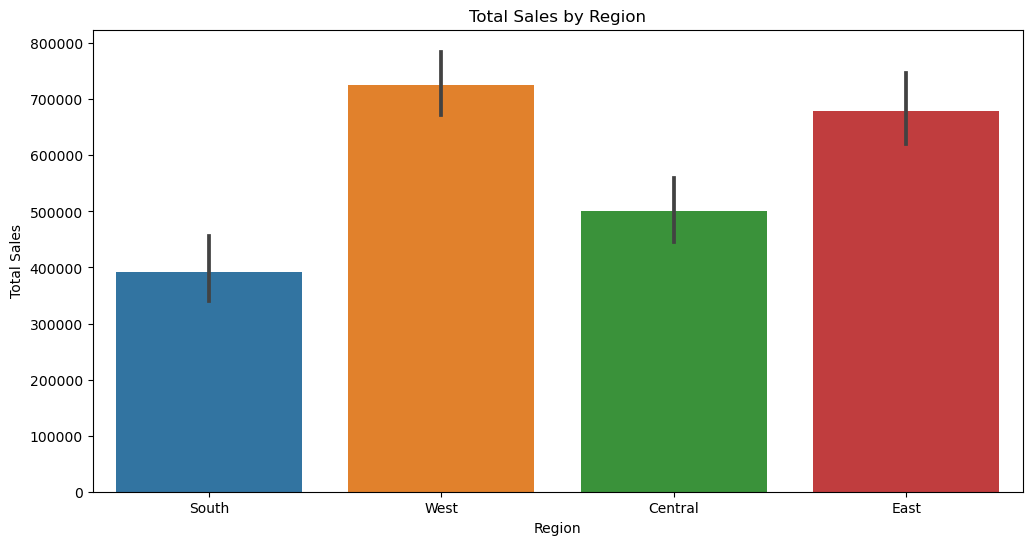

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=data, estimator=np.sum)
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.show()

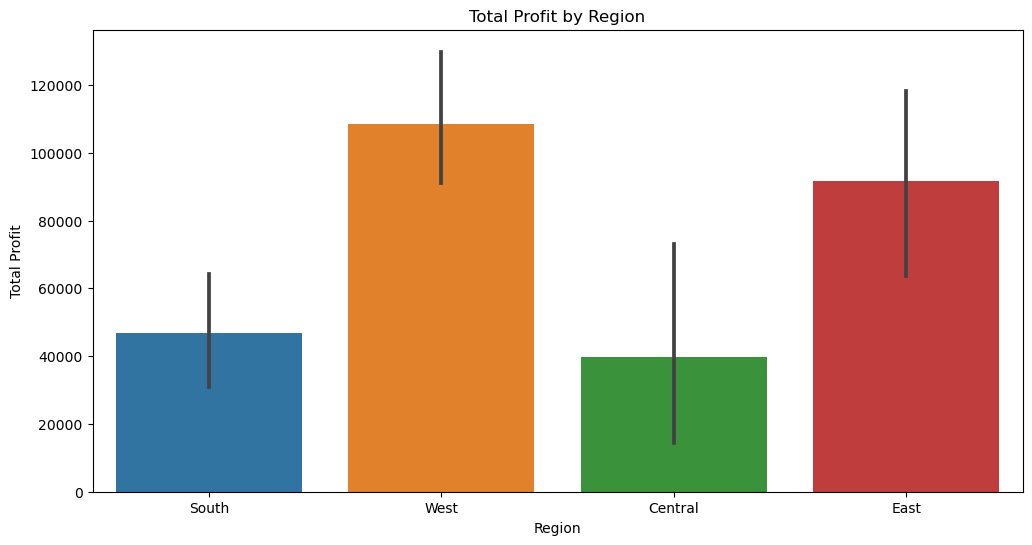

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Profit', data=data, estimator=np.sum)
plt.title("Total Profit by Region")
plt.ylabel("Total Profit")
plt.xlabel("Region")
plt.show()

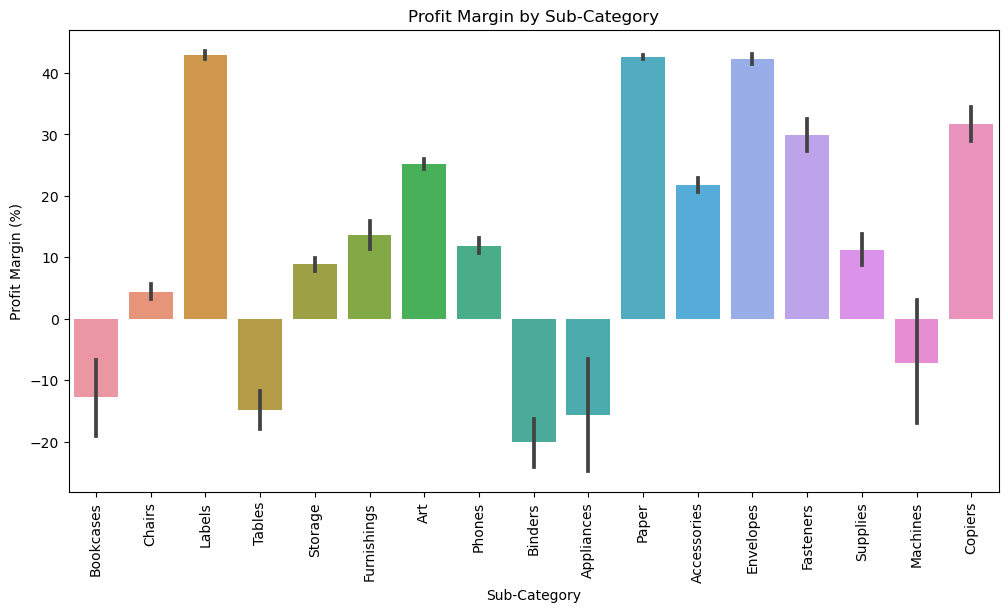

In [40]:
# Analyze profit margin by sub-category
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Profit Margin', data=data)
plt.title("Profit Margin by Sub-Category")
plt.xticks(rotation=90)
plt.ylabel("Profit Margin (%)")
plt.xlabel("Sub-Category")
plt.show()

In [42]:
# Identify weak areas and potential business problems
# - Products with low or negative profit margins.
# - Regions with low profit compared to sales.
# - Categories or sub-categories with low profit.

In [54]:
low_profit_margin_products = data[data['Profit Margin'] < 10]
print(low_profit_margin_products[['Sub-Category', 'Profit Margin']])

     Sub-Category  Profit Margin
3          Tables     -40.000000
10         Tables       5.000000
11         Phones       7.500000
14     Appliances    -180.000000
15        Binders    -150.000000
...           ...            ...
9944      Storage       1.000000
9955       Tables       3.750000
9962    Bookcases     -17.647059
9977    Fasteners       0.000000
9991       Phones       7.500000

[2934 rows x 2 columns]


In [68]:
region_profit_summary = data.groupby('Region')[['Sales', 'Profit']].sum()
region_profit_summary['Profit to Sales Ratio'] = (region_profit_summary['Profit'] / region_profit_summary['Sales']) * 100
print(region_profit_summary)

               Sales       Profit  Profit to Sales Ratio
Region                                                  
Central  501239.8908   39706.3625               7.921629
East     678781.2400   91522.7800              13.483399
South    391721.9050   46749.4303              11.934342
West     725457.8245  108418.4489              14.944831


In [70]:
category_profit_summary = data.groupby('Category')[['Sales', 'Profit']].sum()
category_profit_summary['Profit to Sales Ratio'] = (category_profit_summary['Profit'] / category_profit_summary['Sales']) * 100
print(category_profit_summary)

                       Sales       Profit  Profit to Sales Ratio
Category                                                        
Furniture        741999.7953   18451.2728               2.486695
Office Supplies  719047.0320  122490.8008              17.035158
Technology       836154.0330  145454.9481              17.395712
